In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("bcdata.sgs.27743.csv", sep=';')
df.loc[:,'data'] = pd.to_datetime(df.data, format='%d/%m/%Y')
df

,data,valor
0,2012-01-01,59708
1,2012-02-01,59263
2,2012-03-01,63323
3,2012-04-01,65128
4,2012-05-01,66570
...,...,...
126,2022-07-01,136820
127,2022-08-01,132415
128,2022-09-01,131538
129,2022-10-01,129165


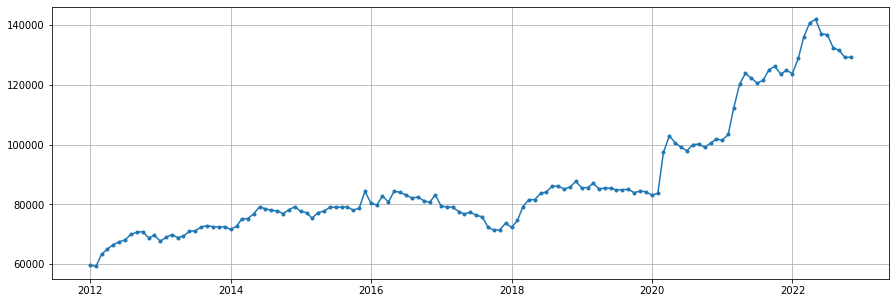

In [3]:
plt.figure(figsize=(15,5))
plt.plot(df.data, df.valor, ".-")
plt.grid()

In [4]:
df.iloc[0] #indice

data     2012-01-01 00:00:00
valor                  59708
Name: 0, dtype: object

In [5]:
df.loc[df.data>'2020-01-01'] #loc = colunas + condicional data

,data,valor
97,2020-02-01,83702
98,2020-03-01,97424
99,2020-04-01,102926
100,2020-05-01,100623
101,2020-06-01,99107
102,2020-07-01,97960
103,2020-08-01,100015
104,2020-09-01,100193
105,2020-10-01,99106
106,2020-11-01,100494


In [7]:
df.loc[df.data>'2020-01-01'].valor.iloc[0]

83702

In [10]:
predicoes = []
erros = []

for dat in df.data:
    if dat == pd.to_datetime ('2012-01-01'):
        erros.append(np.nan)
        predicoes.append(np.nan)
        continue
    valor = df.loc[df.data ==dat].valor.iloc[0]
    pred = df.loc[df.data ==(dat-pd.DateOffset(months=1))].valor.iloc[0]

    predicoes.append(pred)
    erros.append(pred-valor) 

In [11]:
predicoes

[nan,
 59708,
 59263,
 63323,
 65128,
 66570,
 67476,
 68163,
 69965,
 70727,
 70877,
 68837,
 69617,
 67707,
 69077,
 69850,
 68944,
 69438,
 70974,
 71207,
 72405,
 72930,
 72576,
 72443,
 72526,
 71677,
 72691,
 75200,
 75271,
 76891,
 79193,
 78553,
 78028,
 77856,
 76915,
 78248,
 79223,
 77684,
 77239,
 75393,
 77296,
 77716,
 79079,
 79099,
 79080,
 79224,
 78043,
 78827,
 84364,
 80426,
 79835,
 82844,
 80811,
 84462,
 84012,
 83179,
 82136,
 82506,
 81276,
 80698,
 83198,
 79339,
 79187,
 79079,
 77641,
 76816,
 77447,
 76333,
 75909,
 72411,
 71411,
 71525,
 73713,
 72337,
 74654,
 79198,
 81640,
 81559,
 83701,
 84178,
 86092,
 86147,
 85195,
 85793,
 87736,
 85561,
 85637,
 87061,
 85248,
 85449,
 85400,
 84852,
 84946,
 85038,
 83943,
 84479,
 84240,
 83142,
 83702,
 97424,
 102926,
 100623,
 99107,
 97960,
 100015,
 100193,
 99106,
 100494,
 101895,
 101474,
 103412,
 112098,
 120137,
 123822,
 122310,
 120585,
 121501,
 125075,
 126181,
 123605,
 124864,
 123779,
 129056

In [12]:
df_pred = pd.DataFrame()
df_pred

""


In [18]:
df_pred.loc[:,'data'] = df.data
df_pred.loc[:,'valor'] = df.valor
df_pred.loc[:,'predicoes'] = predicoes
df_pred.loc[:,'erros'] = erros
df_pred


,data,valor,predicoes,erros
0,2012-01-01,59708,NaN,NaN
1,2012-02-01,59263,59708.0,445.0
2,2012-03-01,63323,59263.0,-4060.0
3,2012-04-01,65128,63323.0,-1805.0
4,2012-05-01,66570,65128.0,-1442.0
...,...,...,...,...
126,2022-07-01,136820,137020.0,200.0
127,2022-08-01,132415,136820.0,4405.0
128,2022-09-01,131538,132415.0,877.0
129,2022-10-01,129165,131538.0,2373.0


(737425.0, 738657.85)

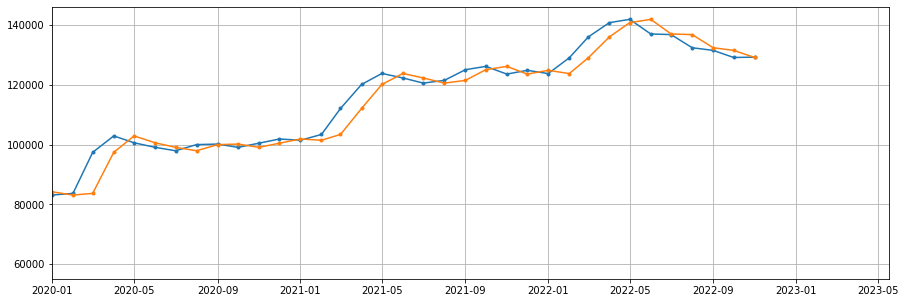

In [22]:
plt.figure(figsize=(15,5))
plt.plot(df_pred.data, df_pred.valor, ".-")
plt.plot(df_pred.data, df_pred.predicoes, ".-")
plt.grid()
plt.xlim(left= pd.to_datetime('2020-01-01'))

In [24]:
df.loc[:,'predicoes'] = df.valor.shift(1)
df

,data,valor,predicoes
0,2012-01-01,59708,NaN
1,2012-02-01,59263,59708.0
2,2012-03-01,63323,59263.0
3,2012-04-01,65128,63323.0
4,2012-05-01,66570,65128.0
...,...,...,...
126,2022-07-01,136820,137020.0
127,2022-08-01,132415,136820.0
128,2022-09-01,131538,132415.0
129,2022-10-01,129165,131538.0


In [26]:
df.loc[:,'erro' ] = df.predicoes - df.valor
df

,data,valor,predicoes,erro
0,2012-01-01,59708,NaN,NaN
1,2012-02-01,59263,59708.0,445.0
2,2012-03-01,63323,59263.0,-4060.0
3,2012-04-01,65128,63323.0,-1805.0
4,2012-05-01,66570,65128.0,-1442.0
...,...,...,...,...
126,2022-07-01,136820,137020.0,200.0
127,2022-08-01,132415,136820.0,4405.0
128,2022-09-01,131538,132415.0,877.0
129,2022-10-01,129165,131538.0,2373.0


In [27]:
df_pred

,data,valor,predicoes,erros
0,2012-01-01,59708,NaN,NaN
1,2012-02-01,59263,59708.0,445.0
2,2012-03-01,63323,59263.0,-4060.0
3,2012-04-01,65128,63323.0,-1805.0
4,2012-05-01,66570,65128.0,-1442.0
...,...,...,...,...
126,2022-07-01,136820,137020.0,200.0
127,2022-08-01,132415,136820.0,4405.0
128,2022-09-01,131538,132415.0,877.0
129,2022-10-01,129165,131538.0,2373.0
